In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_pickle("./data_frames/clean_data.pkl")

In [3]:
#Convenience function for plotting
def scatter(data, x_cat, x_val, y_cat, y_val, label="index"):
    plt.scatter(data[x_cat][x_val], data[y_cat][y_val])
    if label:
        for i in data.index:
            if not(label == "index"):
                lbl = data.loc[i][label][0]
            else:
                lbl = i
            plt.annotate(
                lbl, (
                    data.loc[i][x_cat][x_val] + 0.2, 
                    data.loc[i][y_cat][y_val]
                )
            )
    

#Clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=2)

###Population

Notes:
* Very messy, not sure how useful this is going to be
* Intuitive stuff like "suburbs with more old people have less children" isn't necessarily true

In [7]:
data["cluster"] = kmeans.fit_predict(data["2012_population"])
#data["2012_population"]

In [8]:
data.groupby("cluster").mean()["2012_population"]

,age_0_4_pct,age_0_4_persons,age_10_14_pct,age_10_14_persons,age_15_19_pct,age_15_19_persons,age_20_24_pct,age_20_24_persons,age_25_44_pct,age_25_44_persons,...,age_65_69_persons,age_70_74_pct,age_70_74_persons,age_75_79_pct,age_75_79_persons,age_80_84_pct,age_80_84_persons,age_85_plus_pct,age_85_plus_persons,total_persons
cluster,,,,,,,,,,,,,,,,,,,,,
0,5.675554,504.120000,4.397306,368.680000,5.492505,446.720000,8.224901,771.480000,34.155504,3195.56,...,336.960000,3.040786,262.800000,2.635914,220.160000,2.114741,185.760000,2.077605,193.360000,8839.32
1,6.062452,1555.555556,4.531776,1160.666667,4.995729,1263.666667,8.275330,1987.111111,37.073354,8941.00,...,863.333333,2.840803,678.111111,2.427723,571.444444,2.092012,487.888889,1.893435,441.444444,24404.00


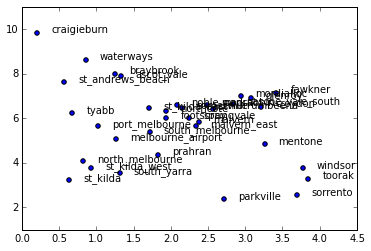

In [10]:
scatter(
    data, 
    "2012_population", "age_85_plus_pct", 
    "2012_population", "age_0_4_pct"
)

###Land Use

Notes:
* Lots of separation on "residential" vs "other"
* Interesting when combined with population stats

In [11]:
data["cluster"] = kmeans.fit_predict(data["land_use"])

In [12]:
data.groupby("cluster").mean()["land_use"]

,commercial_pct,commercial_square_km,industrial_pct,industrial_square_km,other_pct,other_square_km,residential_pct,residential_square_km,rural_pct,rural_sqaure_km
cluster,,,,,,,,,,
0,5.056031,0.204250,4.269664,0.236116,24.621375,1.268222,63.788945,3.236144,2.263985,0.321979
1,2.767070,0.385573,5.729158,0.837497,72.011521,14.587548,12.320661,1.770898,7.171590,2.246311


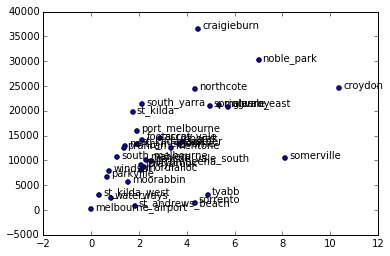

In [18]:
scatter(
    data, 
    "land_use", "residential_square_km", 
    "2012_population", "total_persons",
    #label="cluster"
)


#Misc Investigation

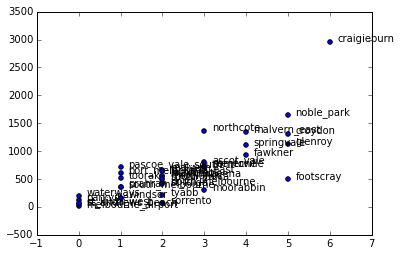

In [14]:
scatter(
    data,
    "services", "primary_schools",
    "2012_population", "age_5_9_persons"
)

####This is depressingly well correlated

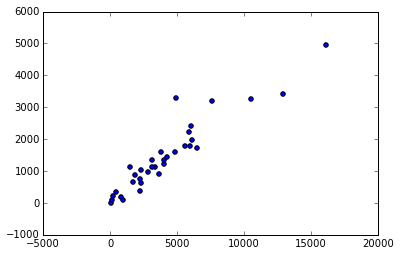

In [30]:
scatter(
    data,
    "diversity", "born_overseas",
    "socio_demographic", "household_income_less_600_week",
    label=None
)

In [20]:
fit = np.polyfit(data["diversity"]["born_overseas"], data["socio_demographic"]["household_income_less_600_week"], 1)
fit_fn = np.poly1d(fit)

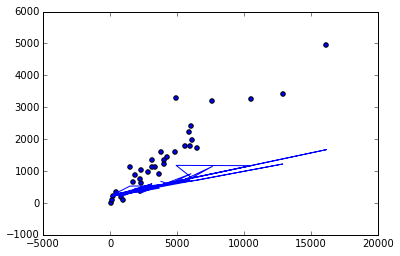

In [26]:
plt.scatter(data["diversity"]["born_overseas"], data["socio_demographic"]["household_income_less_600_week"])
plt.plot(data["diversity"]["born_overseas"], fit_fn(data["socio_demographic"]["household_income_less_600_week"]))